In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

from simtk import unit
from openmmtools.constants import kB
temperature = 300.0 * unit.kelvin
kT = kB * temperature

from pymbar import EXP

In [2]:
outputs = {}
for d in os.listdir('../jnk1/off/'):
    pair = tuple([int(i) for i in d[3:].split('to')])
    outputs[pair] = d
    
jnk1_ligands = [i for i in range(21)]
all_results = {i:{} for i in jnk1_ligands}
oldnew = {0:'old',1:'new'}

In [3]:
for ligand in jnk1_ligands:
    for output in outputs.keys():
        if ligand in output:
            endstate = oldnew[output.index(ligand)]
            solventfile = f'../jnk1/off/{outputs[output]}/{endstate}_solvent.npy'
            if os.path.exists(solventfile):
                solvent = np.load(solventfile,allow_pickle=True).flatten()[0]
                all_results[ligand][f'solvent-{outputs[output]}'] = solvent
            complexfile = f'../jnk1/off/{outputs[output]}/{endstate}_complex.npy'
            if os.path.exists(complexfile):
                complex = np.load(complexfile,allow_pickle=True).flatten()[0]
                all_results[ligand][f'complex-{outputs[output]}'] = complex

Correction is 9.70 (0.43) kcal/mol for ligand 0


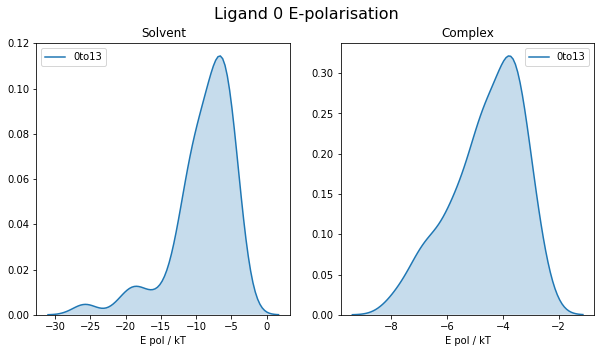

Correction is 30.25 (0.61) kcal/mol for ligand 1


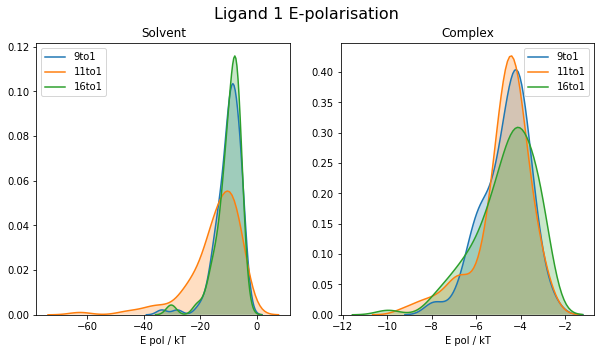

Correction is 7.85 (0.67) kcal/mol for ligand 2


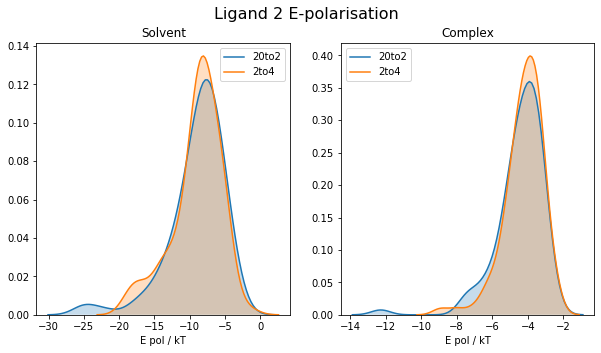

Correction is 6.72 (0.51) kcal/mol for ligand 3


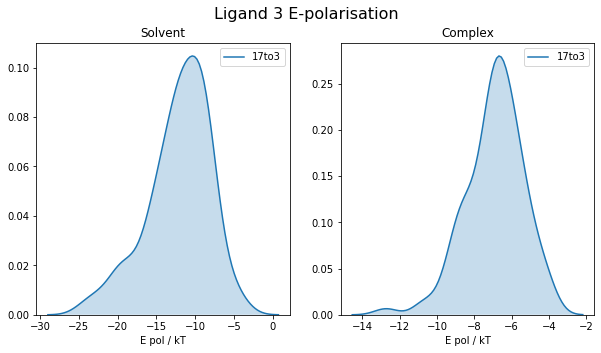

Correction is 10.61 (0.51) kcal/mol for ligand 4


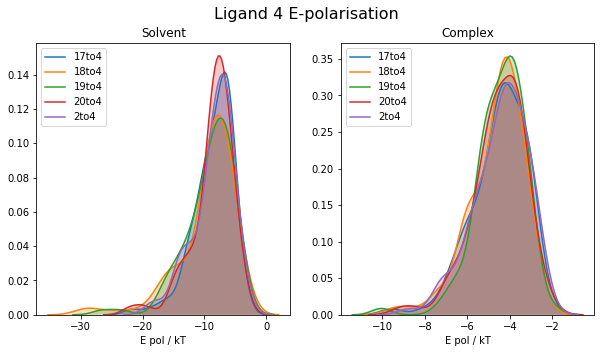

Correction is 10.87 (0.62) kcal/mol for ligand 8


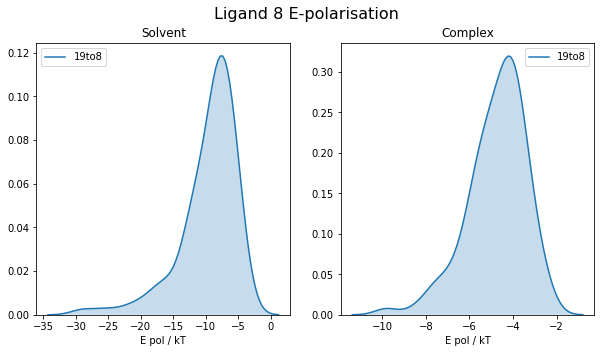

Correction is 7.28 (0.61) kcal/mol for ligand 9


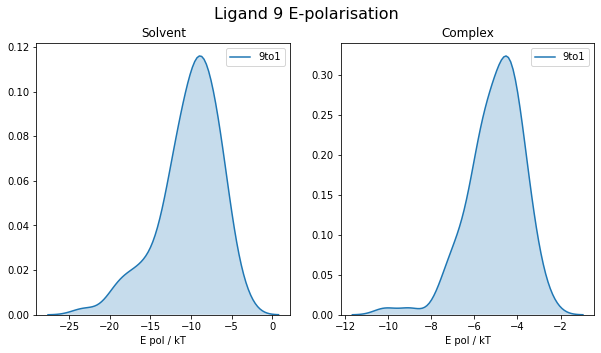

Correction is 16.87 (0.71) kcal/mol for ligand 10


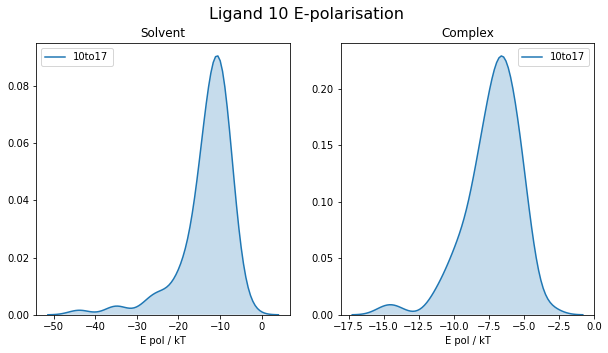

Correction is 37.90 (0.62) kcal/mol for ligand 11


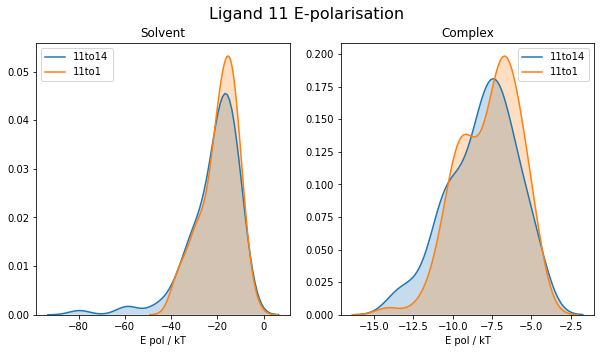

Correction is 10.11 (0.65) kcal/mol for ligand 12


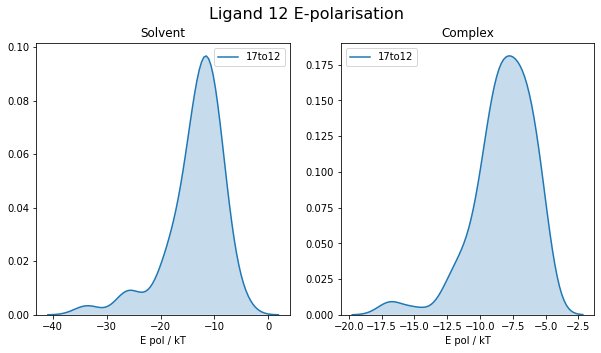

13
Correction is 11.82 (0.82) kcal/mol for ligand 13


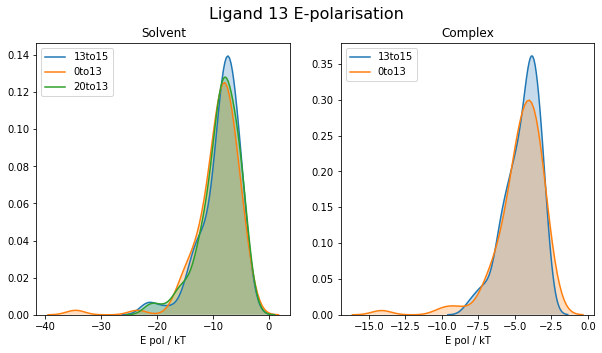

Correction is 21.90 (0.61) kcal/mol for ligand 14


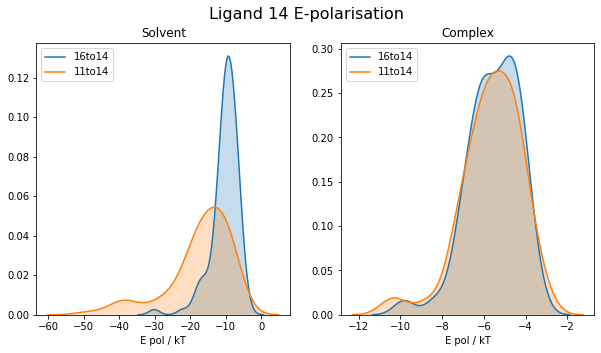

Correction is 7.06 (0.56) kcal/mol for ligand 15


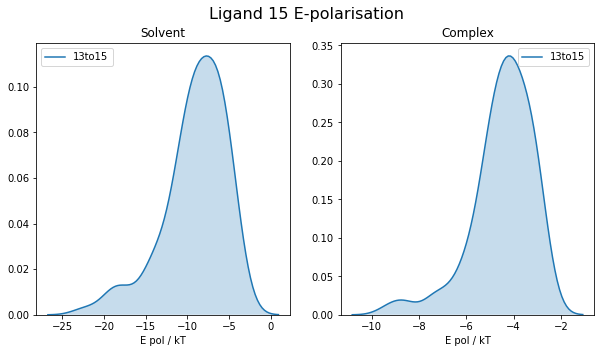

Correction is 11.00 (0.49) kcal/mol for ligand 16


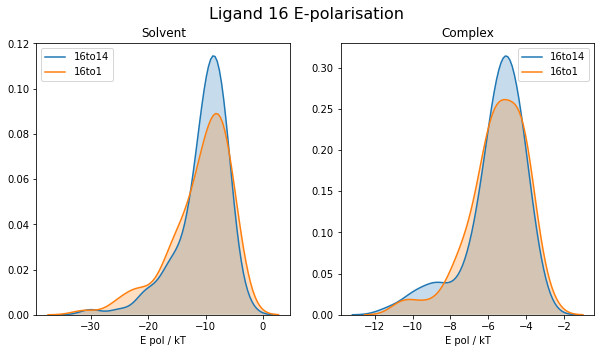

Correction is 11.65 (0.40) kcal/mol for ligand 17


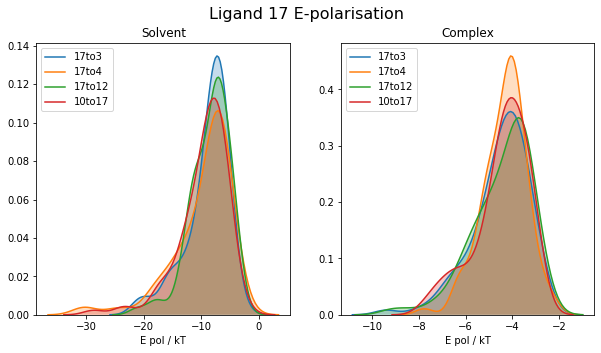

Correction is 6.63 (0.64) kcal/mol for ligand 18


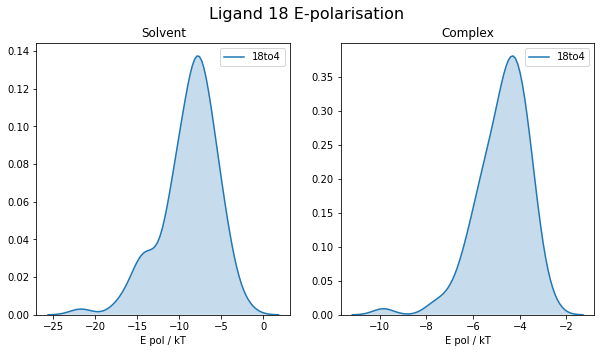

Correction is 11.83 (0.58) kcal/mol for ligand 19


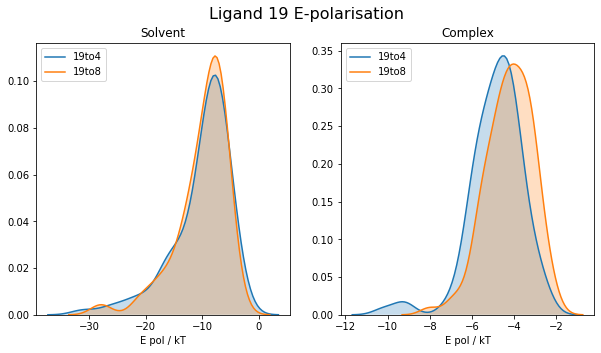

20
Correction is 12.30 (0.55) kcal/mol for ligand 20


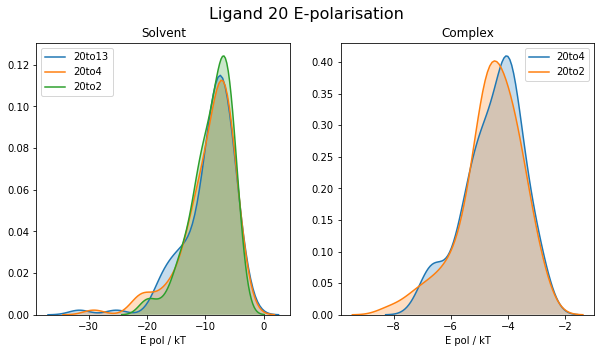

In [9]:
hartree_to_kT = ((1*unit.hartree).in_units_of(unit.joules)*unit.AVOGADRO_CONSTANT_NA / kT)

for ligand in all_results.keys():
    if len(all_results[ligand]) > 0:
        all_solvent_for_lig = []
        all_complex_for_lig = []
        fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
        for thing in all_results[ligand]:
            if 'solvent' in thing:
                Epol = all_results[ligand][thing]['Epol']*hartree_to_kT
                if len(Epol) != 100:
                    print(ligand)
                    continue
                sns.kdeplot(Epol,label=thing.split('-lig')[1],shade=True,ax=axes[0])
                all_solvent_for_lig.extend(Epol)
            elif 'complex' in thing:
                Epol = all_results[ligand][thing]['Epol']*hartree_to_kT
                if len(Epol) != 100:
                    print(ligand)
                    continue
                sns.kdeplot(Epol,label=thing.split('-lig')[1],shade=True,ax=axes[1])
                all_complex_for_lig.extend(Epol)

        if len(all_solvent_for_lig) > 0 and len(all_complex_for_lig) > 0:
            corr_comp, err_comp = EXP(np.asarray(all_complex_for_lig))
            corr_sol, err_sol = EXP(np.asarray(all_solvent_for_lig))
            err = (err_comp**2 + err_sol**2)**0.5
            print(f'Correction is {(corr_comp - corr_sol)*0.593:.2f} ({err*0.593:.2f}) kcal/mol for ligand {ligand}')
        axes[0].set_title('Solvent')
        axes[1].set_title('Complex')
        axes[0].set_xlabel('E pol / kT')
        axes[1].set_xlabel('E pol / kT')
        fig.suptitle(f"Ligand {ligand} E-polarisation", fontsize=16)

        plt.legend()
        plt.show()